# Existence Assertions



In [54]:
import csv
def check_participant_ids(csv_file_path):
    all_good = True
    with open(csv_file_path, 'r') as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            if row.get('Record Type', '') == '3':
                participant_id = row.get('Participant ID', '').strip()
                crash_id = row.get('Crash ID', '').strip()
                if not participant_id or not crash_id:
                    print(f"Missing Participant ID or Crash ID in row: {row}")
                    all_good = False
    if all_good:
        print("All participant records have both a Participant ID and a Crash ID.")

csv_file_path = "/content/DE Week-4/Hwy26Crashes2019_S23.csv"
check_participant_ids(csv_file_path)


All participant records have both a Participant ID and a Crash ID.


# Limit Assertions

In [30]:
def check_crash_year(csv_file_path, expected_year=2019):
    all_good = True
    with open(csv_file_path, 'r') as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            year_str = row.get('Crash Year', '').strip()
            if year_str:
                try:
                    if int(year_str) != expected_year:
                        print(f"Crash year is not {expected_year} in row: {row}")
                        all_good = False
                except ValueError:
                    print(f"Non-numeric Crash Year found: {year_str} in row: {row}")
                    all_good = False
    if all_good:
        print(f"All crash records correctly occurred during the year {expected_year}.")

check_crash_year(csv_file_path)


All crash records correctly occurred during the year 2019.


#Intra-record Assertion

In [31]:
def check_vehicle_sequence_for_participants(csv_file_path):
    all_good = True
    with open(csv_file_path, 'r') as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            if row.get('Record Type', '') == '3':
                vehicle_id = row.get('Vehicle ID', '').strip()
                vehicle_seq = row.get('Vehicle Coded Seq#', '').strip()
                if vehicle_id and not vehicle_seq:
                    print(f"Missing Vehicle Coded Seq# in participant row with Vehicle ID {vehicle_id}: {row}")
                    all_good = False
    if all_good:
        print("All participant records with a Vehicle ID have a corresponding Vehicle Coded Seq#.")

check_vehicle_sequence_for_participants(csv_file_path)


Missing Vehicle Coded Seq# in participant row with Vehicle ID 0: {'Crash ID': '1809229', 'Record Type': '3', 'Vehicle ID': '0', 'Participant ID': '3888074', 'Participant Display Seq#': '2', 'Vehicle Coded Seq#': '', 'Participant Vehicle Seq#': '1', 'Serial #': '', 'Crash Month': '', 'Crash Day': '', 'Crash Year': '', 'Week Day Code': '', 'Crash Hour': '', 'County Code': '', 'City Section ID': '', 'Urban Area Code': '', 'Functional Class Code': '', 'NHS Flag': '', 'Highway Number': '', 'Highway Suffix': '', 'Roadway Number': '', 'Highway Component': '', 'Mileage Type': '', 'Connection Number': '', 'Linear Reference System (LRS)': '', 'Latitude Degrees': '', 'Latitude Minutes': '', 'Latitude Seconds': '', 'Longitude Degrees': '', 'Longitude Minutes': '', 'Longitude Seconds': '', 'Latitude (Decimal Degrees)': '', 'Longitude (Decimal Degrees)': '', 'Special Jurisdiction': '', 'Jurisdiction Group': '', 'Street Number': '', 'Nearest Intersecting Street Number': '', 'Intersection Sequence Num

In [43]:
def check_emergency_response_for_severe_incidents(csv_file_path):
    assertion_passed = True
    with open(csv_file_path, 'r') as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            if 'SEVERE_INCIDENT_CODE' == row.get('Participant Event Code') and not row.get('Emergency Response Flag'):
                print(f"Assertion failed: Emergency response flag missing for severe incident in crash ID {row['Crash ID']}.")
                assertion_passed = False
    if assertion_passed:
        print("All severe incidents have an emergency response flag.")

check_emergency_response_for_severe_incidents(csv_file_path)

All severe incidents have an emergency response flag.


# Inter-record Assertions

In [32]:
def check_vehicle_crash_link(csv_file_path):
    all_good = True
    with open(csv_file_path, 'r') as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            vehicle_id = row.get('Vehicle ID', '').strip()
            crash_id = row.get('Crash ID', '').strip()
            if vehicle_id and not crash_id:
                print(f"Vehicle ID {vehicle_id} not linked to any Crash ID: {row}")
                all_good = False
    if all_good:
        print("Every vehicle listed in the crash data is part of a known crash.")

check_vehicle_crash_link(csv_file_path)



Every vehicle listed in the crash data is part of a known crash.


In [45]:
def check_unique_participant_crashes_per_day(csv_file_path):
    participants_crash_dates = {}
    assertion_passed = True
    with open(csv_file_path, 'r') as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            participant_id = row.get('Participant ID')
            crash_date = row.get('Crash Date')
            if participant_id and crash_date:
                if participant_id in participants_crash_dates and crash_date in participants_crash_dates[participant_id]:
                    print(f"Assertion failed: Participant {participant_id} involved in multiple crashes on {crash_date}.")
                    assertion_passed = False
                participants_crash_dates.setdefault(participant_id, set()).add(crash_date)
    if assertion_passed:
        print("No participant is listed in more than one crash on the same day.")
check_unique_participant_crashes_per_day(csv_file_path)

No participant is listed in more than one crash on the same day.


#Summary Assertions

In [37]:
def check_number_of_crashes(csv_file_path):
    crash_count = 0
    with open(csv_file_path, 'r') as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            if row.get('Crash ID', '').strip():
                crash_count += 1
    if 1000 < crash_count < 1000000:
        print(f"Number of crashes is within the expected range: {crash_count}")
    else:
        print(f"Number of crashes is out of the expected range: {crash_count}")
check_number_of_crashes(csv_file_path)


Number of crashes is within the expected range: 2739


In [38]:
def check_drug_alcohol_involvement(csv_file_path):
    total_crashes = 0
    drug_alcohol_involved_crashes = 0
    with open(csv_file_path, 'r') as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            if row.get('Crash ID', '').strip():
                total_crashes += 1
                if 'Yes' in (row.get('Drugs Involved Flag', 'No'), row.get('Alcohol-Involved Flag', 'No')):
                    drug_alcohol_involved_crashes += 1
    if drug_alcohol_involved_crashes <= 0.1 * total_crashes:
        print(f"Drug or alcohol involvement is within acceptable limits: {drug_alcohol_involved_crashes}/{total_crashes}")
    else:
        print(f"Drug or alcohol involvement exceeds acceptable limits: {drug_alcohol_involved_crashes}/{total_crashes}")

check_drug_alcohol_involvement(csv_file_path)



Drug or alcohol involvement is within acceptable limits: 0/2739


#Statistical Assertion

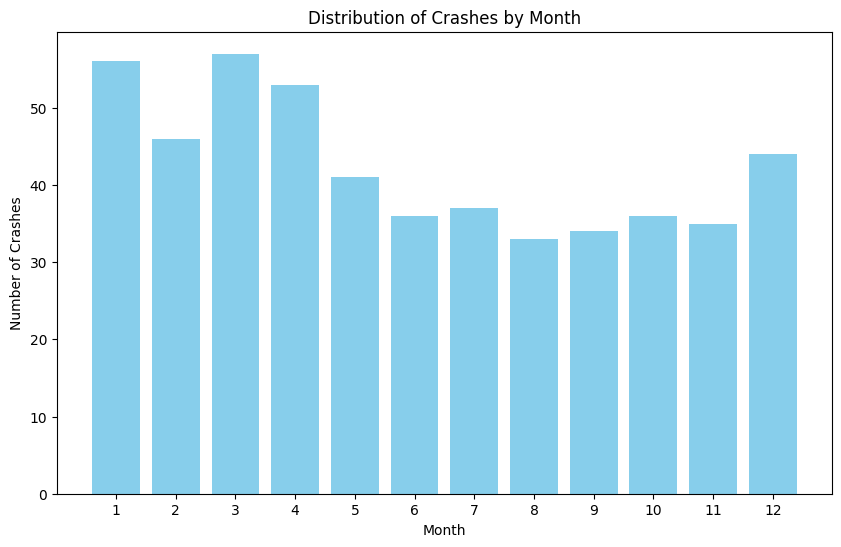

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

def check_crash_distribution_by_month(csv_file_path):
    df = pd.read_csv(csv_file_path)
    monthly_crashes = df['Crash Month'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    plt.bar(monthly_crashes.index, monthly_crashes.values, color='skyblue')
    plt.xlabel('Month')
    plt.ylabel('Number of Crashes')
    plt.title('Distribution of Crashes by Month')
    plt.xticks(range(1, 13))
    plt.show()

check_crash_distribution_by_month(csv_file_path)


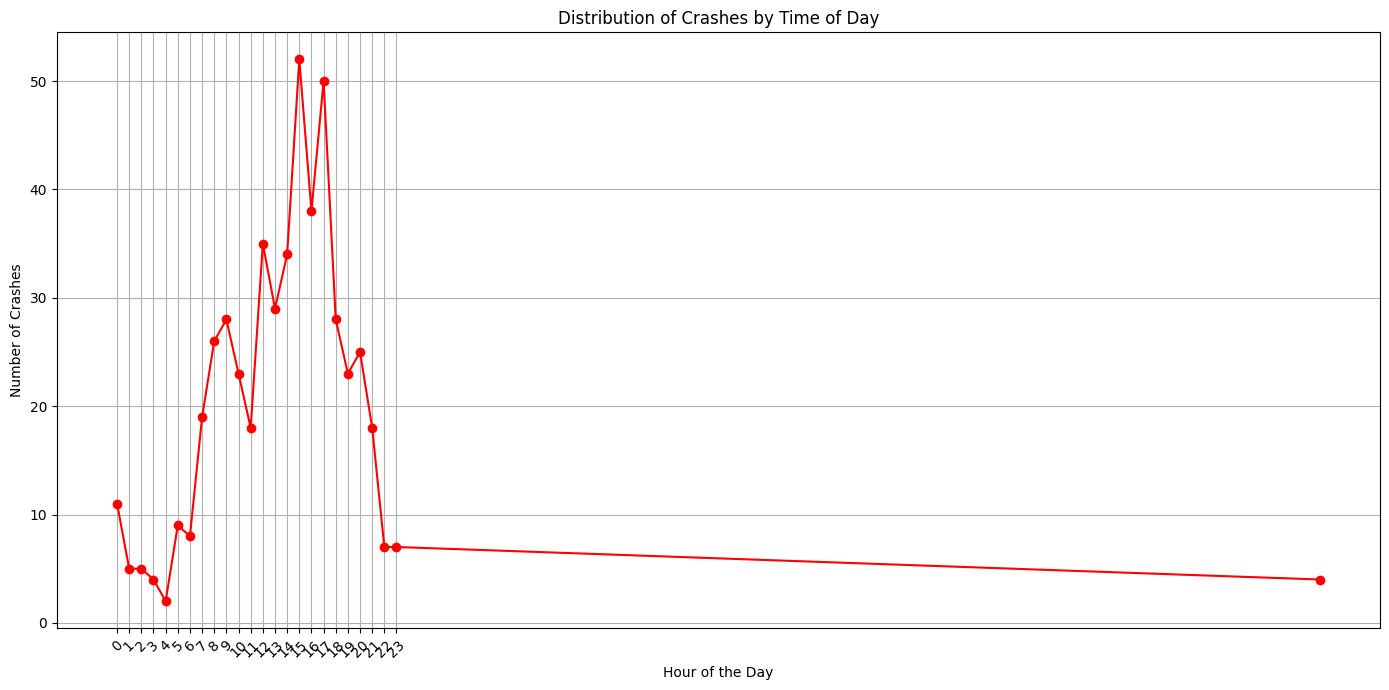

In [55]:
def check_crash_distribution_by_time(csv_file_path):
    df = pd.read_csv(csv_file_path)
    hourly_crashes = df['Crash Hour'].value_counts().sort_index()

    plt.figure(figsize=(14, 7))
    plt.plot(hourly_crashes.index, hourly_crashes.values, marker='o', linestyle='-', color='red')

    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Crashes')
    plt.title('Distribution of Crashes by Time of Day')

    plt.xticks(range(0, 24), rotation=45)

    plt.grid(True)
    plt.tight_layout()
    plt.show()

check_crash_distribution_by_time(csv_file_path)


#Violated Assertion


In [47]:
import pandas as pd

def fix_vehicle_seq_numbers(csv_file_path):
    df = pd.read_csv(csv_file_path)
    missing_seq = df['Vehicle ID'].notnull() & df['Vehicle Coded Seq#'].isnull()

    df.loc[missing_seq, 'Vehicle Coded Seq#'] = -1

    df.to_csv(csv_file_path, index=False)
    print("Missing Vehicle Coded Seq# values fixed.")

fix_vehicle_seq_numbers(csv_file_path)


Missing Vehicle Coded Seq# values fixed.


In [48]:
def check_vehicle_sequence_for_participants(csv_file_path):
    all_good = True
    with open(csv_file_path, 'r') as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            if row.get('Record Type', '') == '3':
                vehicle_id = row.get('Vehicle ID', '').strip()
                vehicle_seq = row.get('Vehicle Coded Seq#', '').strip()
                if vehicle_id and not vehicle_seq:
                    print(f"Missing Vehicle Coded Seq# in participant row with Vehicle ID {vehicle_id}: {row}")
                    all_good = False
    if all_good:
        print("All participant records with a Vehicle ID have a corresponding Vehicle Coded Seq#.")

check_vehicle_sequence_for_participants(csv_file_path)

All participant records with a Vehicle ID have a corresponding Vehicle Coded Seq#.


#New Assertions

In [ ]:
def check_bac_test_results_code(csv_file_path):
    assertion_passed = True
    with open(csv_file_path, 'r') as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            if 'Yes' == row.get('Alcohol-Involved Flag', 'No') and not row.get('BAC Test Results Code'):
                print(f"Assertion failed: BAC Test Results Code missing for crash ID {row['Crash ID']}.")
                assertion_passed = False
    if assertion_passed:
        print("All records with alcohol report flags have a corresponding BAC Test Results Code.")

check_bac_test_results_code(csv_file_path)

All records with alcohol report flags have a corresponding BAC Test Results Code.


In [ ]:
def check_unique_serial_numbers(csv_file_path):
    seen_serial_numbers = set()
    assertion_passed = True
    with open(csv_file_path, 'r') as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            serial_number = row.get('Serial Number')
            if serial_number:
                if serial_number in seen_serial_numbers:
                    print(f"Assertion failed: Duplicate serial number {serial_number} found.")
                    assertion_passed = False
                else:
                    seen_serial_numbers.add(serial_number)
    if assertion_passed:
        print("All serial numbers across crash records are unique.")
check_unique_serial_numbers(csv_file_path)

All serial numbers across crash records are unique.
